In [ ]:
from sklearn.datasets import load_wine
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

In [ ]:
dataset = load_wine()
x, y = dataset.data, dataset.target

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(
  x, y, test_size = 0.3, random_state=42)

In [ ]:
parameters = {
  'criterion': ['gini', 'entropy'],
  'max_depth': [None, 2, 4, 8, 10],
  'min_samples_split': [1, 2, 4],
  'min_samples_leaf': [1, 2],
  'max_features': ['auto', 'sqrt', 'log2']
}

In [ ]:
clf = RandomForestClassifier(random_state = 42)
grid_cv = GridSearchCV(clf, parameters, cv = 10, n_jobs = -1)
grid_cv.fit(x_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
600 fits failed out of a total of 1800.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
600 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py", line 450, in fit
    trees = Parallel(
  File "/usr/local/lib/python3.8/dist-packages/joblib/parallel.py", line 1085, in __call__
    if self.dispatch_one_batch(iterator):
  File "/usr/local/lib/python3.8/dist-packages/joblib/parallel.py

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=42),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 2, 4, 8, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [1, 2, 4]})

In [ ]:
print(f"Parameters of best model: {grid_cv.best_params_}")
print(f"Score of best model: {grid_cv.best_score_}")

Parameters of best model: {'criterion': 'gini', 'max_depth': 2, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2}
Score of best model: 0.9756410256410255


In [ ]:
score = grid_cv.score(x_test, y_test)
print(f"Accuracy: {score}")

Accuracy: 0.9629629629629629


In [ ]:
# This may not the best way to view each estimator as it is small
import matplotlib.pyplot as plt
fn=dataset.feature_names
cn=dataset.target_names
fig, axes = plt.subplots(nrows = 1,ncols = 5,figsize = (10,2), dpi=900)
for index in range(0, 5):
    tree.plot_tree(rf.estimators_[index],
                   feature_names = fn, 
                   class_names=cn,
                   filled = True,
                   ax = axes[index]);

    axes[index].set_title('Estimator: ' + str(index), fontsize = 11)
fig.savefig('rf_5trees.png')

Accuracy: 0.9629629629629629


In [ ]:
from sklearn import tree
import graphviz
dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=dataset.feature_names,  
                                class_names=dataset.target_names,
                                filled=True)
graph = graphviz.Source(dot_data, format="png") 
graph

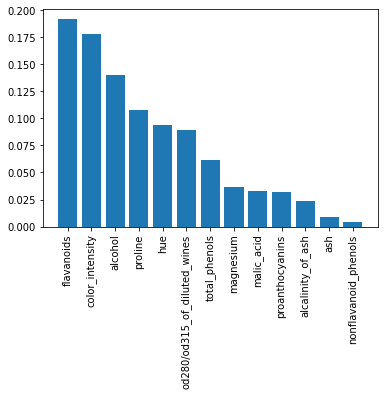

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

best_model = grid_cv.best_estimator_
importances = best_model.feature_importances_

# Zeige die Wichtigkeit der Merkmale in einem Bar-Diagramm
sorted_idx = np.argsort(importances)[::-1]
labels = np.array(dataset.feature_names)[sorted_idx]
plt.bar(range(x.shape[1]), importances[sorted_idx])
plt.xticks(range(x.shape[1]), labels, rotation=90)
plt.show()

In [ ]:
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

dataset = load_wine()
x, y = dataset.data, dataset.target
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size = 0.3, random_state=42)

parameters = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 2, 4, 8, 10],
    'min_samples_split': [1, 2, 4],
    'min_samples_leaf': [1, 2],
    'max_features': ['auto', 'sqrt', 'log2'],
    'n_estimators': [10, 20, 50, 100, 200]
}

clf = RandomForestClassifier(random_state=42)
grid_cv = GridSearchCV(clf, parameters, cv=10, n_jobs=-1)
grid_cv.fit(x_train, y_train)




Parameters of best model: {'criterion': 'gini', 'max_depth': 4, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 20}
Score of best model: 0.9839743589743589
Accuracy: 0.9444444444444444


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
3000 fits failed out of a total of 9000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3000 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py", line 450, in fit
    trees = Parallel(
  File "/usr/local/lib/python3.8/dist-packages/joblib/parallel.py", line 1085, in __call__
    if self.dispatch_one_batch(iterator):
  File "/usr/local/lib/python3.8/dist-packages/joblib/parallel.

In [ ]:
print(f"Parameters of best model: {grid_cv.best_params_}")
print(f"Score of best model: {grid_cv.best_score_}")
score = grid_cv.score(x_test, y_test)
print(f"Accuracy: {score}")

Parameters of best model: {'criterion': 'gini', 'max_depth': 4, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 20}
Score of best model: 0.9839743589743589
Accuracy: 0.9444444444444444


AttributeError: ignored

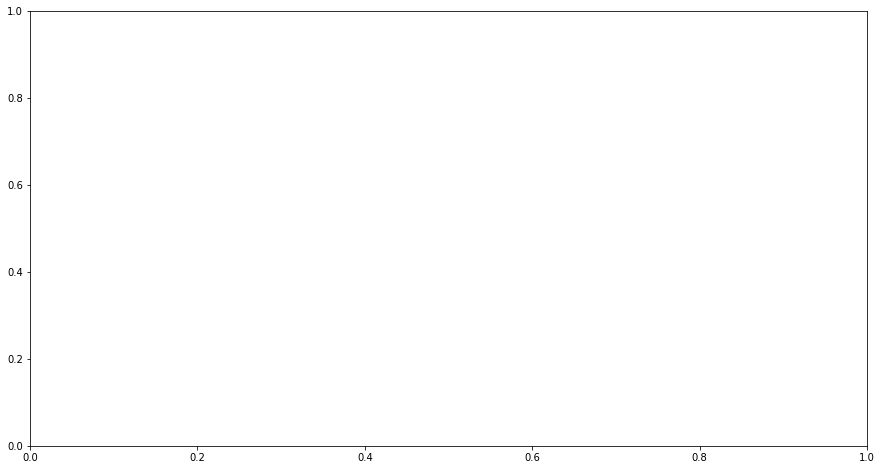

In [ ]:
from sklearn import tree
for i in range(5):
    fig, ax = plt.subplots(figsize=(15,8))
    dot_data = tree.export_graphviz(grid_cv.estimators_[i], out_file=None, 
                                feature_names=dataset.feature_names,  
                                class_names=dataset.target_names,
                                filled=True)
    graph = graphviz.Source(dot_data, format="png") 
    plt.imshow(graph.pipe(format='png'))
    ax.axis('off')
    plt.title("Decision Tree {}".format(i+1))
    plt.show()